### Generate Multivariate Dataset

Expression for a chaotic time series:

$\quad X[n + 1] = X[n]^2 + \epsilon[n] + b, \quad \epsilon \sim \mathcal{N} (0, \sigma_n^2)$

for a chaotic time series $b = -1.9$ and $X[1] = 0.5$.

Generate correlated time series:

$\quad X[n + 1]_1 = X[n]_1^2 + \epsilon[n]_1 + b$

$\quad\vdots$

$\quad X[n + 1]_t = X[n + 1]_{t - 1} - a \cdot ( X[n + 1]_{t - 1} - 1) + \epsilon[n]_t$

$\quad\vdots$

$\quad X[n + 1]_T = X[n + 1]_{T - 1} - a \cdot ( X[n + 1]_{T - 1} - 1) + \epsilon[n]_T$


the task index is $t = \{ 1, \dots, T \}$, T is tasks number, $a$ is any correlation constant, In this experiment is $a = \frac{3\cdot t}{2}$. And if there is noise, it is independet for each taks, so $\epsilon_t \sim \mathcal{N} (0, \sigma_n^2)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Correlated Time Series Noiseless or with white Noise added
def generate_multivariate_predictiors_serie(X, T = 2, mu = 0, s2 = 0., a = 3/2):
    N = X.shape[0]
    Y = np.empty((N, T))
    E = np.random.normal(mu, s2, N)
    Y[..., 0] = X + E
    
    for t in range(1, T):
        E = np.random.normal(mu, s2, N)
        Y[..., t] = Y[..., t - 1] - a*t*(Y[..., t - 1] - 1.) + E
        
    return Y

# Generate Chaotic System
def generate_chaotic_time_series(N, c = -1.9, x_n = .5):
    X = [x_n]

    for i in range(N):
        x_n_1 = X[-1]**2 + c 
        x_n   = x_n_1
        X.append(x_n)

    return np.asarray(X)


# Number of sample on dataset
N = 300

# Dataset Chaotic Parameters
X = generate_chaotic_time_series(N, c = -1.9, x_n = .5)
print(X.shape)

X = generate_multivariate_predictiors_serie(X, T = 4, mu = 0., s2 = 0.25, a = 3./2.)
print(X.shape)

(301,)
(301, 4)


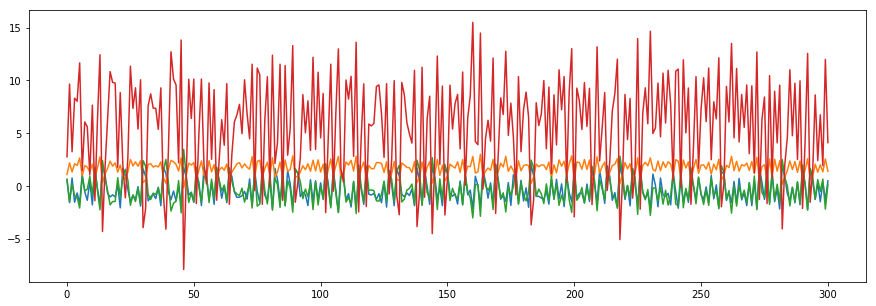

In [2]:
plt.figure(figsize = (15, 5))
plt.plot(X[:, 0])
plt.plot(X[:, 1])
plt.plot(X[:, 2])
plt.plot(X[:, 3])
plt.show()